<a href="https://colab.research.google.com/github/god05212/Machine-Learning/blob/main/%EA%B3%A0%EA%B0%9D%EC%9D%B4_%ED%98%B8%ED%85%94%EC%98%88%EC%95%BD%EC%9D%84_%EC%B7%A8%EC%86%8C%ED%95%A0%EC%A7%80_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
updloaded = files.upload()

Saving Hotel Reservations.csv to Hotel Reservations.csv


In [2]:
# dataset 가져오기
import pandas as pd
# 변수의 이름 "df"를 사용하여 데이터베이스 읽기
df = pd.read_csv('Hotel Reservations.csv')
# dataset 상위 5개만 보기
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
# 행 36275, 열 19
df.shape

(36275, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
# 이 dataset에는 NaN 값이 없음
df.isnull().sum().sum() == 0

True

In [6]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

> 여기서 범주형 및 연속형 변수가 있고, 이 'Booking_ID'열이 사용되지 않을 수 있으며, null 값이 없는 것도 확인할 수 있습니다.

> 변수 간의 상관 관계를 확인.

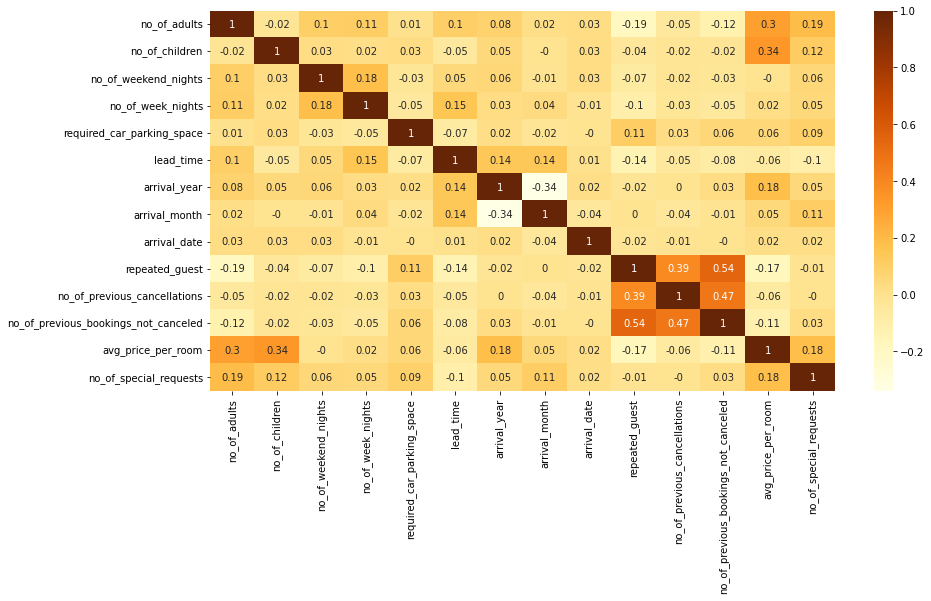

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

양의 상관관계 예시(r > 0) : 지능지수와 성적, 키와 몸무게  
음의 상관관계 예시(r < 0) : 농작물 수확량과 가격, 고도와 기온  
무의 상관관계 예시(r = 0) : 범죄율과 아이스크림 판매량  
-1.0 <= r <= -0.7 : 매우 강한 음(-)의 상관관계  
-0.7 < r <= -0.3 : 강한 음(-)의 상관관계  
-0.3 < r <= -0.1 : 약한 음(-)의 상관관계  
-0.1 < r <= 0.1 : 상관관계 없음  
0.1 < r <= 0.3 : 약한 양(+)의 상관관계  
0.3 < r <= 0.7 : 강한 양(+)의 상관관계  
0.7 < r <= 1.0 : 매우 강한 양(+)의 상관관계

> 우리는 변수들 사이에 강한 상관관계가 없다는 것을 알 수 있다.